In [8]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL for Amazon search
URL = "https://www.amazon.com/s?k=playstation+5&crid=9GEUI2VU92KE&sprefix=playstation%2Caps%2C213&ref=nb_sb_ss_w_hit-vc-lth_playstation-5_k0_1_11"
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

# Make the GET request
response = requests.get(URL, headers=HEADERS)

# Check if the request was successful
if response.status_code == 200:
    print("Request successful!")
else:
    print(f"Request failed with status code: {response.status_code}")

# Parse the HTML content with BeautifulSoup
soup = BeautifulSoup(response.content, "html.parser")

# Find product containers
products = soup.find_all("div", {"data-component-type": "s-search-result"})

# Extract product names and prices
product_list = []
for product in products:
    try:
        name = product.h2.text.strip()  # Product title
        price_whole = product.find("span", class_="a-price-whole")
        price_fraction = product.find("span", class_="a-price-fraction")
        
        # Combine whole and fractional price
        if price_whole and price_fraction:
            price = f"{price_whole.text.strip()}.{price_fraction.text.strip()}"
        else:
            price = "N/A"
        
        product_list.append({"Name": name, "Price": price})
    except AttributeError:
        continue

# Create a DataFrame from the scraped data
df = pd.DataFrame(product_list)

# Save to a CSV file
df.to_csv("amazon_products.csv", index=False)

# Display the DataFrame
print(df)


Request successful!
                                                 Name    Price
0   Playstation 5 Disc Version PS5 Console - 4K-TV...      N/A
1                                        KontrolFreek   16..99
2   Playstation 5 Disc Version PS5 Console - 4K-TV...      N/A
3   PlayStation®5 console (slim) with EA SPORTS Co...      N/A
4     $150 PlayStation Store Gift Card [Digital Code]  150..00
5                            NBA 2K25 - PlayStation 5   29..99
6                     EA SPORTS FC 25 - PlayStation 5   29..99
7                                         PlayStation      N/A
8                       Madden NFL 25 - PlayStation 5   29..99
9                                             Seagate  129..99
10         Sonic X Shadow Generations - PlayStation 5   29..99
11  PS5 Slim Cooling Station，Charging Controller，F...   23..39
12      EA SPORTS College Football 25 - PlayStation 5   29..99
13    $250 PlayStation Store Gift Card [Digital Code]  250..00
14                                 

In [9]:
from bs4 import BeautifulSoup
import requests
import pandas as pd

# URL for Amazon search
URL = "https://www.amazon.com/s?k=playstation+5&crid=9GEUI2VU92KE&sprefix=playstation%2Caps%2C213&ref=nb_sb_ss_w_hit-vc-lth_playstation-5_k0_1_11"
HEADERS = {
    'User-Agent': 'Mozilla/5.0 (Windows NT 10.0; Win64; x64) AppleWebKit/537.36 (KHTML, like Gecko) Chrome/131.0.0.0 Safari/537.36',
    'Accept-Language': 'en-US, en;q=0.5'
}

# Make the GET request
response = requests.get(URL, headers=HEADERS)

# Check if the request was successful
if response.status_code == 200:
    print("Request successful!")
else:
    print(f"Request failed with status code: {response.status_code}")

Request successful!


In [10]:
type(response.content)

bytes

In [12]:
soup = BeautifulSoup(response.content, "html.parser") 

In [16]:
#fetch links as list of tag objects
links = soup.find_all("a", attrs={'class':'a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal'})

In [17]:
links

[<a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/Playstation-Disc-Version-Console-Bluetooth_5-1/dp/B0BMX3GLX4/ref=sr_1_1?crid=9GEUI2VU92KE&amp;dib=eyJ2IjoiMSJ9.7d6BFA0ulX_9bCEYcBa1MdAJLKWTOLDNz2_BFgjA9u7Qi1oGjCxwHijqDqzf9DO4mZWqJ_HdVC_zWKzq1Wr9wqGUJf8T54L64VVysbpCHpy_e_2wCfvuGcs7zAsnh_uA_euLVR0dnDRuI8y6NBPz7cL5e6I40wF5rLgaKzFCOWrJ-ktRxEiz_jUUe1YQYm4itWF_VLUOJ-DEeeAmPPxNgUmuai91uXBs7PMiTKsJtmU.bM-0hN_Xf-N536Rm_fzr5l0I5hmBXBqEErUOG0W8h3M&amp;dib_tag=se&amp;keywords=playstation+5&amp;qid=1732697136&amp;sprefix=playstation%2Caps%2C213&amp;sr=8-1"><span class="a-size-medium a-color-base a-text-normal">Playstation 5 Disc Version PS5 Console - 4K-TV Gaming.120Hz 8K Output, 16GB GDDR6, 825GB SSD, WiFi 6, Bluetooth_5.1</span> </a>,
 <a class="a-link-normal s-underline-text s-underline-link-text s-link-style a-text-normal" href="/sspa/click?ie=UTF8&amp;spc=MToxNTY2OTkwNzkzMTU2MTM5OjE3MzI2OTcxMzY6c3BfYXRmOjMwMDU0MTUxNTk5NTQwMjo6MDo6&amp;url=%2FPla

In [23]:
link = links[0].get('href')

In [29]:
product_link_list = "https://amazon.com" + link

In [30]:
product_link_list

'https://amazon.com/Playstation-Disc-Version-Console-Bluetooth_5-1/dp/B0BMX3GLX4/ref=sr_1_1?crid=9GEUI2VU92KE&dib=eyJ2IjoiMSJ9.7d6BFA0ulX_9bCEYcBa1MdAJLKWTOLDNz2_BFgjA9u7Qi1oGjCxwHijqDqzf9DO4mZWqJ_HdVC_zWKzq1Wr9wqGUJf8T54L64VVysbpCHpy_e_2wCfvuGcs7zAsnh_uA_euLVR0dnDRuI8y6NBPz7cL5e6I40wF5rLgaKzFCOWrJ-ktRxEiz_jUUe1YQYm4itWF_VLUOJ-DEeeAmPPxNgUmuai91uXBs7PMiTKsJtmU.bM-0hN_Xf-N536Rm_fzr5l0I5hmBXBqEErUOG0W8h3M&dib_tag=se&keywords=playstation+5&qid=1732697136&sprefix=playstation%2Caps%2C213&sr=8-1'

In [33]:
new_response = requests.get(product_link_list, headers= HEADERS)

In [35]:
new_response

<Response [200]>

In [36]:
new_soup = BeautifulSoup(new_response.content, "html.parser")

<!DOCTYPE html>
<html class="a-no-js" data-19ax5a9jf="dingo" lang="en-us"><!-- sp:feature:head-start -->
<head><script>var aPageStart = (new Date()).getTime();</script><meta charset="utf-8"/>
<!-- sp:end-feature:head-start -->
<!-- sp:feature:csm:head-open-part1 -->
<script type="text/javascript">var ue_t0=ue_t0||+new Date();</script>
<!-- sp:end-feature:csm:head-open-part1 -->
<!-- sp:feature:cs-optimization -->
<meta content="on" http-equiv="x-dns-prefetch-control"/>
<link href="https://images-na.ssl-images-amazon.com" rel="dns-prefetch"/>
<link href="https://m.media-amazon.com" rel="dns-prefetch"/>
<link href="https://completion.amazon.com" rel="dns-prefetch"/>
<!-- sp:end-feature:cs-optimization -->
<!-- sp:feature:csm:head-open-part2 -->
<script type="text/javascript">
window.ue_ihb = (window.ue_ihb || window.ueinit || 0) + 1;
if (window.ue_ihb === 1) {

var ue_csm = window,
    ue_hob = +new Date();
(function(d){var e=d.ue=d.ue||{},f=Date.now||function(){return+new Date};e.d=func
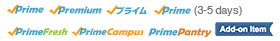

In [37]:
new_soup

In [41]:
new_soup.find("span", attrs={"id":'productTitle'}).text.strip()

'Playstation 5 Disc Version PS5 Console - 4K-TV Gaming.120Hz 8K Output, 16GB GDDR6, 825GB SSD, WiFi 6, Bluetooth_5.1'